<a href="https://colab.research.google.com/github/Gamalia75/my_repository/blob/main/Lesson_66/HW_66_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лекція 66. Робота з відеоформатом

### Завдання:

#### Використовуючи тренувальний датасет з архіву data.zip та матеріали з додаткових джерел, спробуйте побудувати систему детекції медичних масок на обличчі.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_USERNAME']='YOUR KAGGLE USERNAME'
os.environ['KAGGLE_KEY']='YOUR KAGGLE KEY'


In [4]:
main_dir = '/content/drive/MyDrive/Colab Notebooks/covid19-face-mask-detection-cnn-opencv-main/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [5]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0693.jpg', '0091.jpg', '0759.jpg', '0791.jpg', '0592.jpg', '0243.jpg', '0343.jpg', '0323.jpg', '0655.jpg', '0650.jpg']
['131.jpg', '157.jpg', '153.jpg', '127.jpg', '151.jpg', '122.jpg', '14.jpg', '120.jpg', '130.jpg', '0.jpg']


['/content/drive/MyDrive/Colab Notebooks/covid19-face-mask-detection-cnn-opencv-main/New Masks Dataset/Train/Mask/0693.jpg', '/content/drive/MyDrive/Colab Notebooks/covid19-face-mask-detection-cnn-opencv-main/New Masks Dataset/Train/Mask/0091.jpg', '/content/drive/MyDrive/Colab Notebooks/covid19-face-mask-detection-cnn-opencv-main/New Masks Dataset/Train/Mask/0759.jpg', '/content/drive/MyDrive/Colab Notebooks/covid19-face-mask-detection-cnn-opencv-main/New Masks Dataset/Train/Mask/0791.jpg', '/content/drive/MyDrive/Colab Notebooks/covid19-face-mask-detection-cnn-opencv-main/New Masks Dataset/Train/Mask/0592.jpg', '/content/drive/MyDrive/Colab Notebooks/covid19-face-mask-detection-cnn-opencv-main/New Masks Dataset/Train/Mask/0243.jpg', '/content/drive/MyDrive/Colab Notebooks/covid19-face-mask-detection-cnn-opencv-main/New Masks Dataset/Train/Mask/0343.jpg', '/content/drive/MyDrive/Colab Notebooks/covid19-face-mask-detection-cnn-opencv-main/New Masks Dataset/Train/Mask/0323.jpg']
['/cont

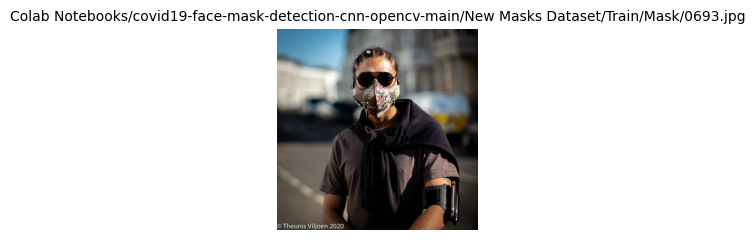

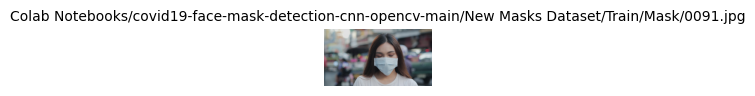

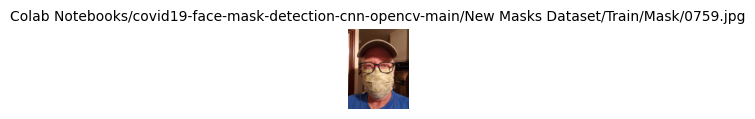

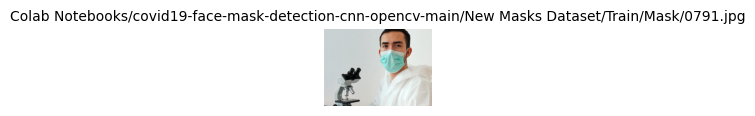

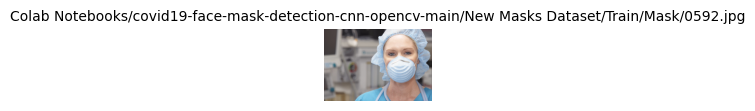

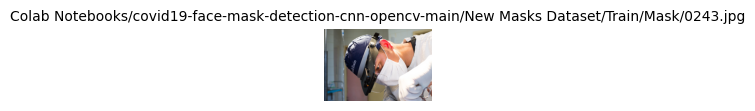

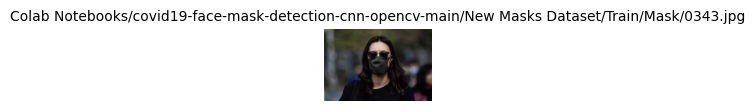

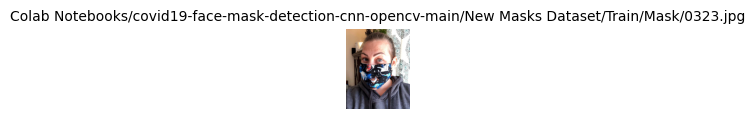

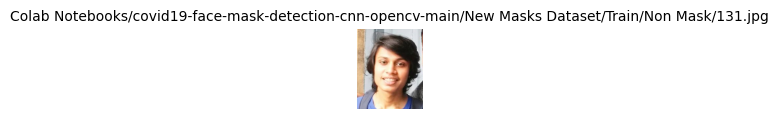

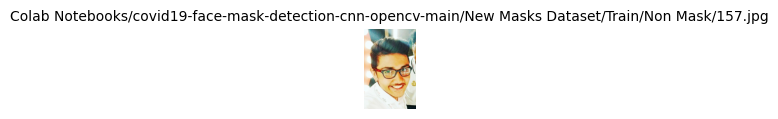

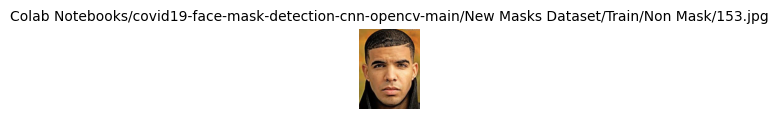

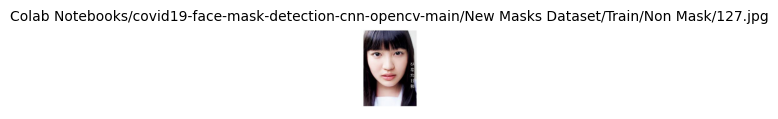

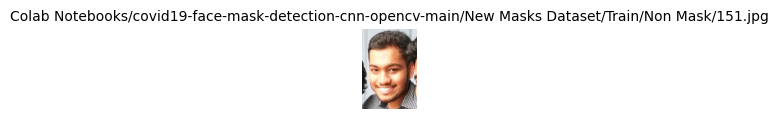

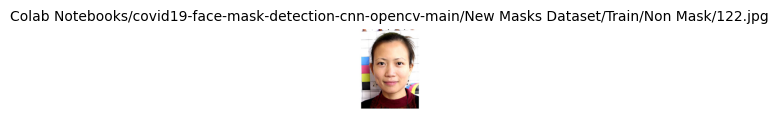

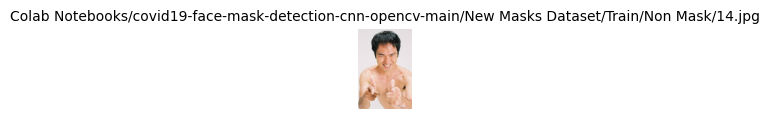

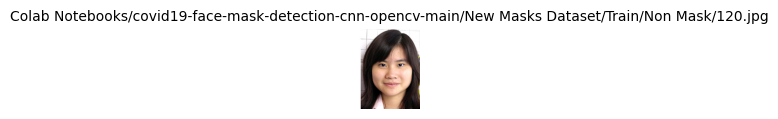

In [6]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4

plt.figure(figsize=(12,12))

mask_pic =[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic= []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))  

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
  
  plt.show()

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip =True
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [9]:
train_generator.image_shape

(150, 150, 3)

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [11]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 14s 759ms/step - loss: 0.3819 - accuracy: 0.8517 - val_loss: 0.5194 - val_accuracy: 0.7511
Epoch 2/30
19/19 [==============================] - 14s 753ms/step - loss: 0.3270 - accuracy: 0.8750 - val_loss: 0.2752 - val_accuracy: 0.8945
Epoch 3/30
19/19 [==============================] - 14s 740ms/step - loss: 0.3238 - accuracy: 0.8733 - val_loss: 0.3321 - val_accuracy: 0.8819
Epoch 4/30
19/19 [==============================] - 14s 745ms/step - loss: 0.2879 - accuracy: 0.9033 - val_loss: 0.3536 - val_accuracy: 0.8523
Epoch 5/30
19/19 [==============================] - 15s 796ms/step - loss: 0.2456 - accuracy: 0.9183 - val_loss: 0.3525 - val_accuracy: 0.8565
Epoch 6/30
19/19 [==============================] - 14s 762ms/step - loss: 0.2414 - accuracy: 0.8917 - val_loss: 0.2483 - val_accuracy: 0.9030
Epoch 7/30
19/19 [==============================] - 14s 764ms/step - loss: 0.2122 - accuracy: 0.9183 - val_loss: 0.2797 - val_accuracy: 0.8819

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'poch')

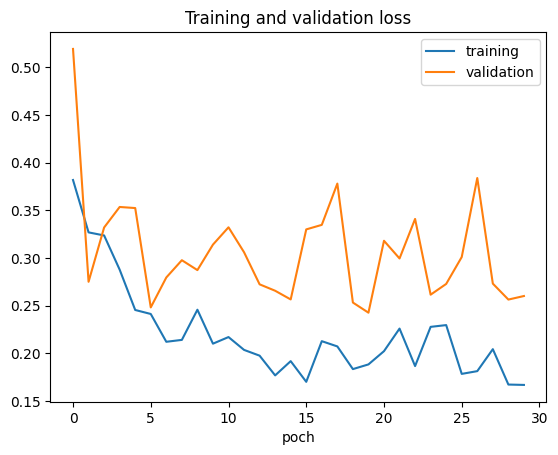

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('poch')


Text(0.5, 0, 'poch')

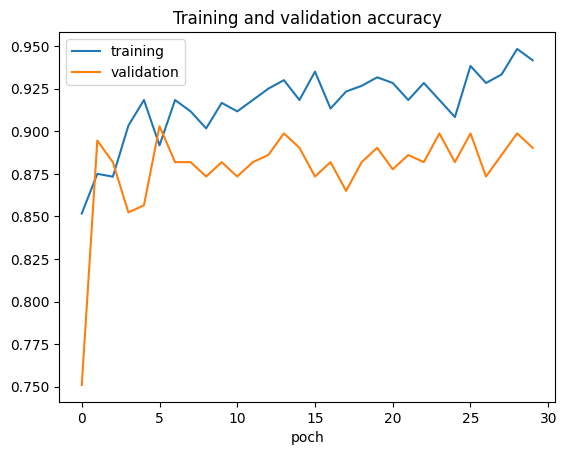

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('poch')

In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 46s 15s/step - loss: 0.1556 - accuracy: 0.9400
test loss:0.15557624399662018 test acc:0.9399999976158142


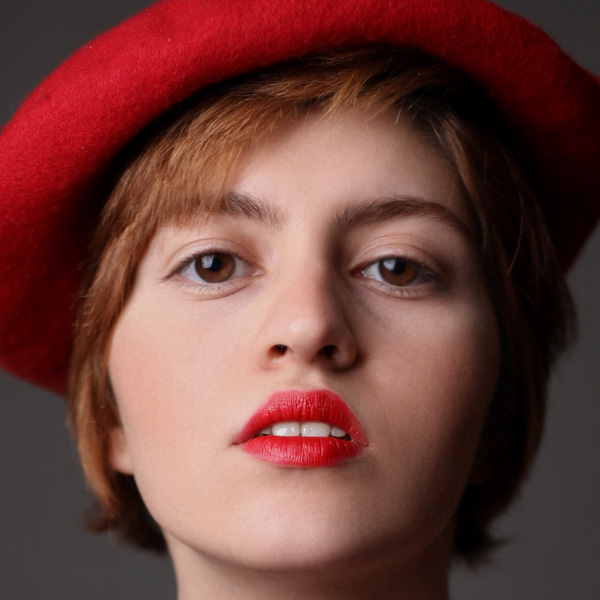

In [39]:
import cv2 as cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/11.jpg', cv2.IMREAD_COLOR)
cv2_imshow(img)

In [40]:
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('Є маска')
  else:
    print('Немає маски')  


Saving 11.jpg to 11.jpg
1/1 [==============================] - 0s 18ms/step
11.jpg
Немає маски


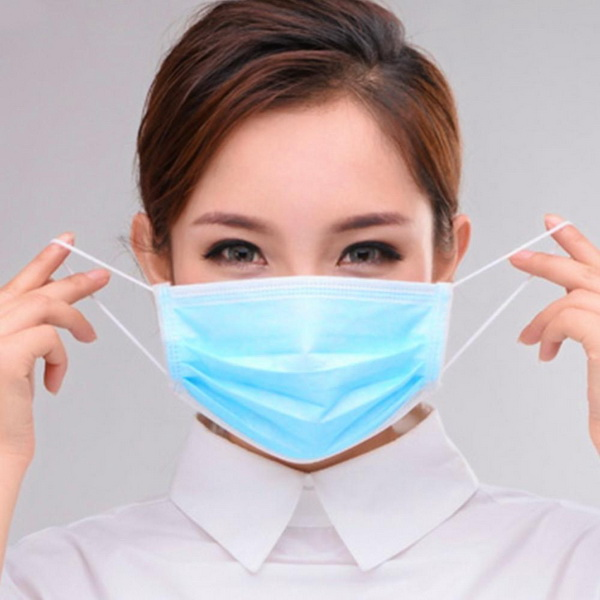

In [41]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/22.jpg', cv2.IMREAD_COLOR)
cv2_imshow(img)

In [42]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('Є маска')
  else:
    print('Немає маски')  

Saving 22.jpg to 22.jpg
1/1 [==============================] - 0s 18ms/step
22.jpg
Є маска


In [25]:
model.save('model.h5')

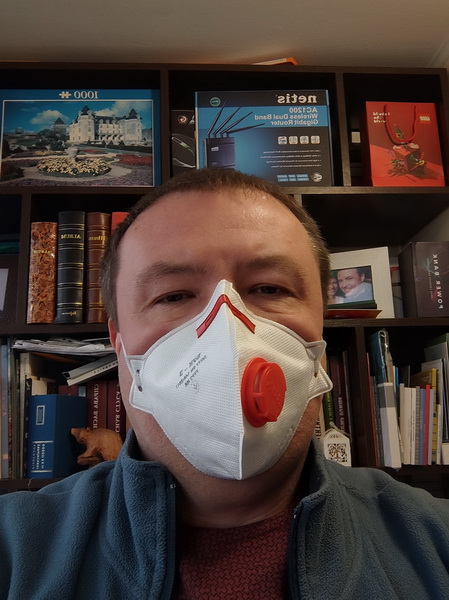

In [43]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/333.jpg', cv2.IMREAD_COLOR)
cv2_imshow(img)

In [44]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('Є маска')
  else:
    print('Немає маски')  

Saving 333.jpg to 333 (1).jpg
1/1 [==============================] - 0s 21ms/step
333.jpg
Є маска


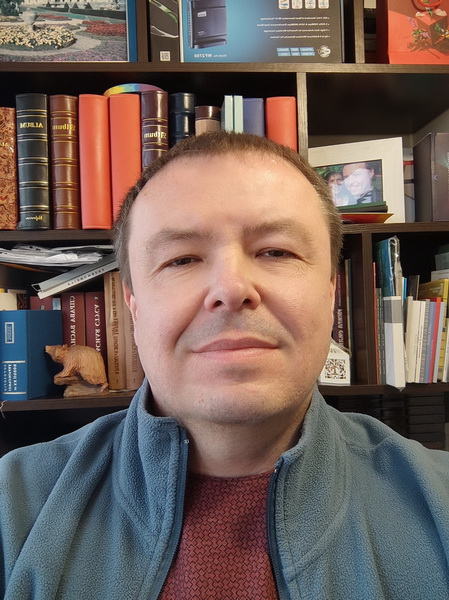

In [45]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/222.jpg', cv2.IMREAD_COLOR)
cv2_imshow(img)

In [46]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('Є маска')
  else:
    print('Немає маски')  

Saving 222.jpg to 222 (2).jpg
1/1 [==============================] - 0s 18ms/step
222.jpg
Немає маски
